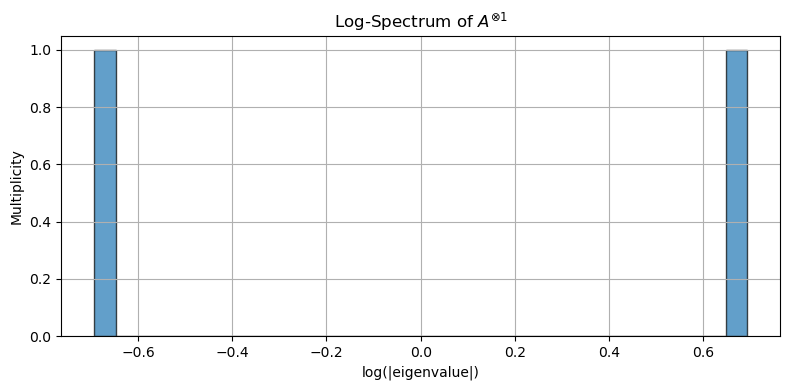

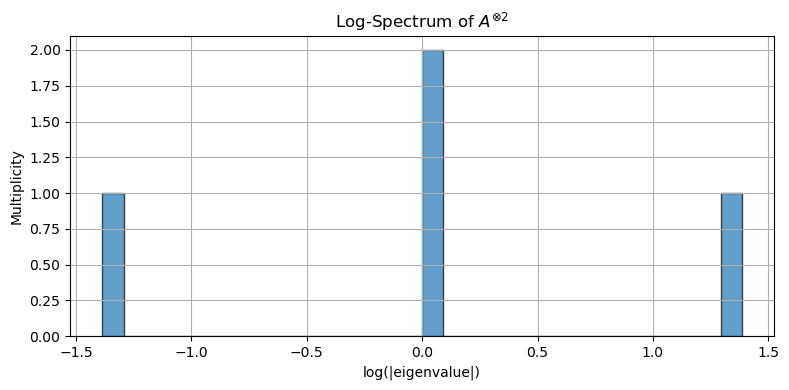

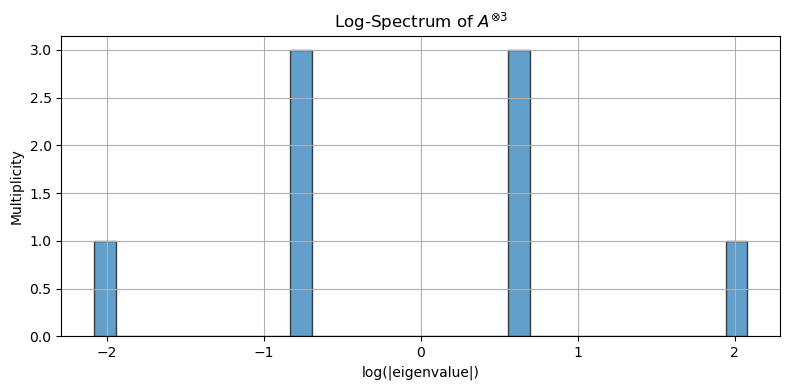

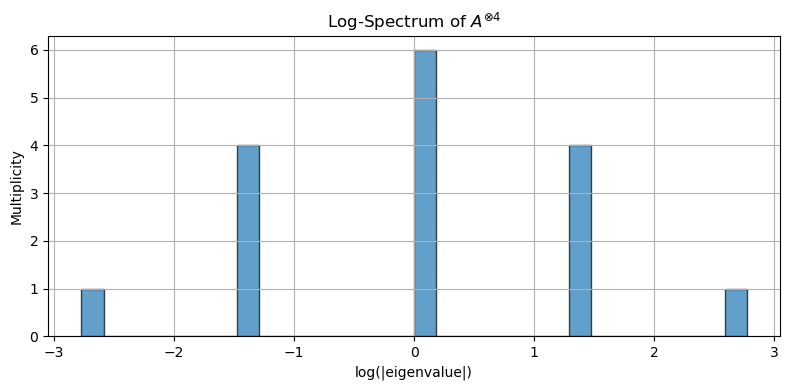

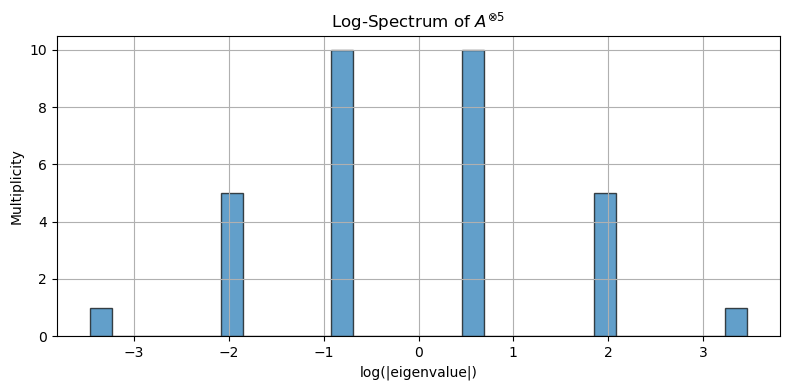

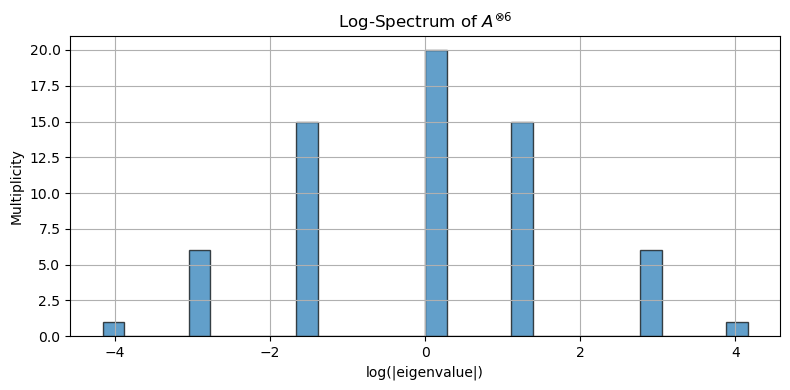

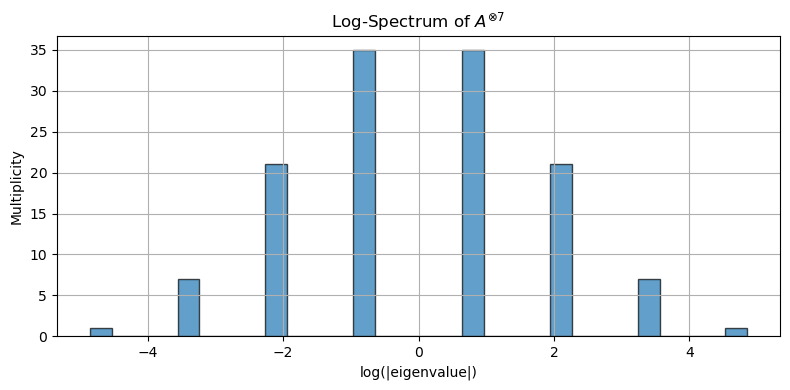

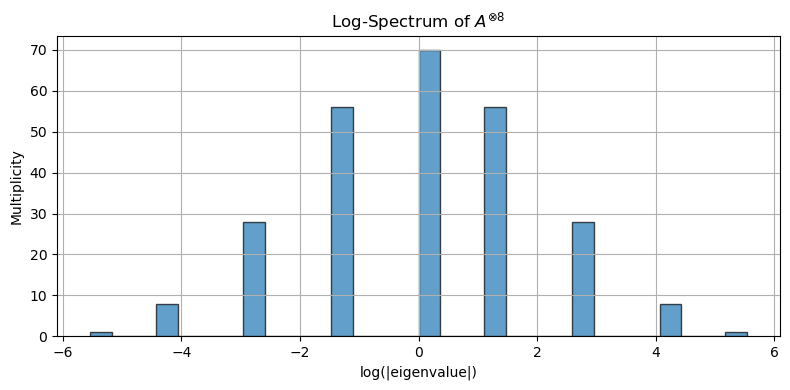

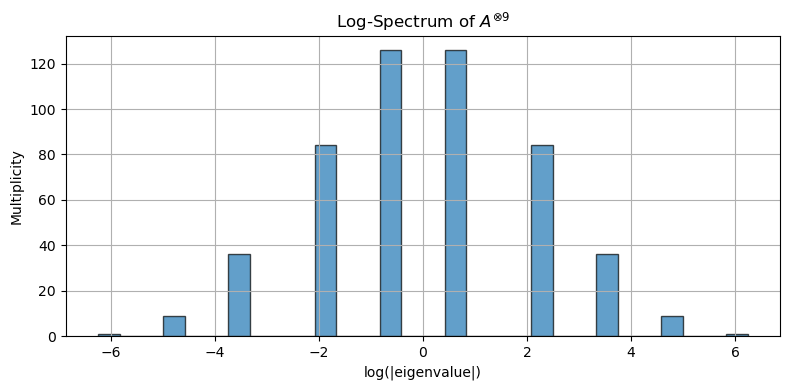

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Define matrix A
A = np.array([[2, 0], [0, 0.5]])

# Get eigenvalues of A
eigvals = np.linalg.eigvals(A)


def get_kron_eigvals(eigvals, n):
    """
    Recursively compute the eigenvalues of A^{⊗n}
    by multiplying combinations of eigenvalues.
    """
    # Initialize with eigenvalues of A
    eigvals_n = eigvals.copy()
    for _ in range(1, n):
        eigvals_n = np.outer(eigvals_n, eigvals).flatten()
    return eigvals_n


def plot_spectrum(n, log_scale=False):
    eigs = get_kron_eigvals(eigvals, n)

    if log_scale:
        eigs = np.log(np.abs(eigs))
        title = f"Log-Spectrum of $A^{{\\otimes {n}}}$"
        xlabel = "log(|eigenvalue|)"
    else:
        title = f"Spectrum of $A^{{\\otimes {n}}}$"
        xlabel = "Eigenvalue"

    # Histogram
    plt.figure(figsize=(8, 4))
    plt.hist(eigs, bins=30, edgecolor="k", alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Multiplicity")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Plot examples
for n in range(1, 10):
    plot_spectrum(n, log_scale=True)

In [3]:
import numpy as np


def kron_power(matrix, n):
    """
    Computes the Kronecker (tensor) power: matrix^{⊗n}
    """
    result = matrix
    for _ in range(1, n):
        result = np.kron(result, matrix)
    return result


def compute_tensor_prod_spectrum(A, B, i, j):
    """
    Computes (A^{⊗i} ⊗ B^{⊗j}) and its eigenvalues.
    Returns:
        - full Kronecker product matrix
        - eigenvalues
    """
    A_kron = kron_power(A, i)
    B_kron = kron_power(B, j)
    full_kron = np.kron(A_kron, B_kron)
    eigvals = np.linalg.eigvals(full_kron)
    return full_kron, eigvals


# Example matrices
A = np.array([[2, 0], [0, 0.5]])

B = np.array([[0, 1], [1, 0]])

# Choose tensor powers
i = 4
j = 4

# Compute
tensor_prod, eigs = compute_tensor_prod_spectrum(A, B, i, j)

# Print results
print(f"(A^{i} ⊗ B^{j}) has shape: {tensor_prod.shape}")
print("Eigenvalues:")
print(np.round(eigs, 4))  # rounded for readability

(A^4 ⊗ B^4) has shape: (256, 256)
Eigenvalues:
[ 16.     -16.      16.     -16.      16.     -16.      16.     -16.
  16.     -16.      16.     -16.      16.     -16.      16.     -16.
   4.      -4.       4.      -4.       4.      -4.       4.      -4.
   4.      -4.       4.      -4.       4.      -4.       4.      -4.
   4.      -4.       4.      -4.       4.      -4.       4.      -4.
   4.      -4.       4.      -4.       4.      -4.       4.      -4.
   1.      -1.       1.      -1.       1.      -1.       1.      -1.
   1.      -1.       1.      -1.       1.      -1.       1.      -1.
   4.      -4.       4.      -4.       4.      -4.       4.      -4.
   4.      -4.       4.      -4.       4.      -4.       4.      -4.
   1.      -1.       1.      -1.       1.      -1.       1.      -1.
   1.      -1.       1.      -1.       1.      -1.       1.      -1.
   1.      -1.       1.      -1.       1.      -1.       1.      -1.
   1.      -1.       1.      -1.       1.      -1.      

In [4]:
n, m, p, q = 2, 2, 2, 2  # Dimensions of matrices A and B

# Matrix dimensions
A_shape = (n, m)  # Dimensions of matrix A (n x m)
B_shape = (p, q)  # Dimensions of matrix B (p x q)

# Tensor powers
i = 6
j = 6

# Calculate the total number of elements in the Kronecker product
rows_A = A_shape[0] * (2**i)
cols_A = A_shape[1] * (2**i)
rows_B = B_shape[0] * (2**j)
cols_B = B_shape[1] * (2**j)

# Total number of elements in the final matrix
total_elements = rows_A * cols_A * rows_B * cols_B

# Space complexity in bytes (assuming float64 = 8 bytes per element)
space_bytes = total_elements * 8

# Convert to GB
space_gb = space_bytes / (1024**3)

print(f"Estimated space complexity for A^{i} ⊗ B^{j}: {space_gb:.4f} GB")

Estimated space complexity for A^6 ⊗ B^6: 2.0000 GB


In [5]:
def generate_young_diagrams(n, max_rows=3):
    """Generate all valid Young diagrams with n boxes and up to max_rows rows."""

    def partitions(n, max_len, max_val):
        if n == 0:
            return [[]]
        if max_len == 0:
            return []
        result = []
        for i in range(min(n, max_val), 0, -1):
            for tail in partitions(n - i, max_len - 1, i):
                result.append([i] + tail)
        return result

    # Pad with zeros so all diagrams have exactly 3 elements (3 rows)
    raw = partitions(n, max_rows, n)
    return [tuple(p + [0] * (max_rows - len(p))) for p in raw if len(p) <= max_rows]


def dynkin_labels(diagram):
    """Convert a Young diagram (as tuple) to SU(3) Dynkin labels (a, b)."""
    λ1, λ2, λ3 = diagram[:3]  # Always safe now
    return (λ1 - λ2, λ2 - λ3)


def su3_dimension(a, b):
    """Compute dimension of SU(3) irrep with Dynkin labels (a, b)."""
    return (a + 1) * (b + 1) * (a + b + 2) // 2


def diagram_to_string(diagram):
    """Return a string representation of a Young diagram."""
    return "\n".join(["□ " * row for row in diagram if row > 0])


def generate_su3_irreps(n):
    print(f"\nSU(3) irreducible decomposition of 3^{n} = {3**n}-dim space:\n")
    diagrams = generate_young_diagrams(n)
    total_dim = 0
    for d in diagrams:
        a, b = dynkin_labels(d)
        dim = su3_dimension(a, b)
        total_dim += dim
        print(f"Diagram: {d}  →  Dynkin (a={a}, b={b}) → Dim: {dim}")
        print(diagram_to_string(d))
        print("-" * 30)
    print(f"Total dimension check: {total_dim}")


# Try it now for n = 5
generate_su3_irreps(5)


SU(3) irreducible decomposition of 3^5 = 243-dim space:

Diagram: (5, 0, 0)  →  Dynkin (a=5, b=0) → Dim: 21
□ □ □ □ □ 
------------------------------
Diagram: (4, 1, 0)  →  Dynkin (a=3, b=1) → Dim: 24
□ □ □ □ 
□ 
------------------------------
Diagram: (3, 2, 0)  →  Dynkin (a=1, b=2) → Dim: 15
□ □ □ 
□ □ 
------------------------------
Diagram: (3, 1, 1)  →  Dynkin (a=2, b=0) → Dim: 6
□ □ □ 
□ 
□ 
------------------------------
Diagram: (2, 2, 1)  →  Dynkin (a=0, b=1) → Dim: 3
□ □ 
□ □ 
□ 
------------------------------
Total dimension check: 69


In [6]:
def generate_young_diagrams(n, max_rows=3):
    """Generate all valid Young diagrams with n boxes and up to max_rows rows."""

    def partitions(n, max_len, max_val):
        if n == 0:
            return [[]]
        if max_len == 0:
            return []
        result = []
        for i in range(min(n, max_val), 0, -1):
            for tail in partitions(n - i, max_len - 1, i):
                result.append([i] + tail)
        return result

    # Pad with zeros so all diagrams have exactly max_rows rows
    raw = partitions(n, max_rows, n)
    return [tuple(p + [0] * (max_rows - len(p))) for p in raw if len(p) <= max_rows]


def dynkin_labels(diagram):
    λ1, λ2, λ3 = diagram[:3]
    return (λ1 - λ2, λ2 - λ3)


def su3_dimension(a, b):
    return (a + 1) * (b + 1) * (a + b + 2) // 2


def standard_tableaux_count(shape):
    """Hook-length formula for number of standard Young tableaux of a given shape."""
    from math import factorial

    n = sum(shape)
    hooks = []
    rows = shape
    for i in range(len(rows)):
        for j in range(rows[i]):
            hook_len = rows[i] - j
            for k in range(i + 1, len(rows)):
                if j < rows[k]:
                    hook_len += 1
            hooks.append(hook_len)
    product = 1
    for h in hooks:
        product *= h
    return factorial(n) // product


def diagram_to_string(diagram):
    return "\n".join(["□ " * row for row in diagram if row > 0])


def generate_su3_irreps_with_multiplicities(n):
    print(f"\nSU(3) irreducible decomposition of 3^{n} = {3**n}-dim space:\n")
    diagrams = generate_young_diagrams(n)
    total_dim = 0
    for d in diagrams:
        a, b = dynkin_labels(d)
        dim = su3_dimension(a, b)
        mult = standard_tableaux_count(d)
        total_contribution = mult * dim
        total_dim += total_contribution
        print(f"Diagram: {d}  →  Dynkin (a={a}, b={b}) → Dim: {dim} × Mult: {mult} = {total_contribution}")
        print(diagram_to_string(d))
        print("-" * 80)
    print(f"Total dimension check: {total_dim}")


generate_su3_irreps_with_multiplicities(10)


SU(3) irreducible decomposition of 3^10 = 59049-dim space:

Diagram: (10, 0, 0)  →  Dynkin (a=10, b=0) → Dim: 66 × Mult: 1 = 66
□ □ □ □ □ □ □ □ □ □ 
--------------------------------------------------------------------------------
Diagram: (9, 1, 0)  →  Dynkin (a=8, b=1) → Dim: 99 × Mult: 9 = 891
□ □ □ □ □ □ □ □ □ 
□ 
--------------------------------------------------------------------------------
Diagram: (8, 2, 0)  →  Dynkin (a=6, b=2) → Dim: 105 × Mult: 35 = 3675
□ □ □ □ □ □ □ □ 
□ □ 
--------------------------------------------------------------------------------
Diagram: (8, 1, 1)  →  Dynkin (a=7, b=0) → Dim: 36 × Mult: 36 = 1296
□ □ □ □ □ □ □ □ 
□ 
□ 
--------------------------------------------------------------------------------
Diagram: (7, 3, 0)  →  Dynkin (a=4, b=3) → Dim: 90 × Mult: 75 = 6750
□ □ □ □ □ □ □ 
□ □ □ 
--------------------------------------------------------------------------------
Diagram: (7, 2, 1)  →  Dynkin (a=5, b=1) → Dim: 48 × Mult: 160 = 7680
□ □ □ □ □ □

In [7]:
def generate_su3_target(n):
    """
    Generate the SU(3) irreps decomposition of (C^3)^⊗n.
    Returns a list of dicts with Dynkin labels, dimension, multiplicity, and contribution.
    """
    diagrams = generate_young_diagrams(n)
    target = []
    total_dim = 0

    for d in diagrams:
        a, b = dynkin_labels(d)
        dim = su3_dimension(a, b)
        mult = standard_tableaux_count(d)
        total_contribution = mult * dim
        total_dim += total_contribution

        target.append({
            "dynkin": (a, b),
            "multiplicity": mult,
            "dimension": dim,
            "contribution": total_contribution,
            "diagram": d
        })

    return {
        "irreps": target,
        "total_dim": total_dim,
        "expected_dim": 3**n
    }


In [15]:
result = generate_su3_target(6)
for entry in result["irreps"]:
    print(entry)
print("Check:", result["total_dim"], "=", result["expected_dim"])


{'dynkin': (6, 0), 'multiplicity': 1, 'dimension': 28, 'contribution': 28, 'diagram': (6, 0, 0)}
{'dynkin': (4, 1), 'multiplicity': 5, 'dimension': 35, 'contribution': 175, 'diagram': (5, 1, 0)}
{'dynkin': (2, 2), 'multiplicity': 9, 'dimension': 27, 'contribution': 243, 'diagram': (4, 2, 0)}
{'dynkin': (3, 0), 'multiplicity': 10, 'dimension': 10, 'contribution': 100, 'diagram': (4, 1, 1)}
{'dynkin': (0, 3), 'multiplicity': 5, 'dimension': 10, 'contribution': 50, 'diagram': (3, 3, 0)}
{'dynkin': (1, 1), 'multiplicity': 16, 'dimension': 8, 'contribution': 128, 'diagram': (3, 2, 1)}
{'dynkin': (0, 0), 'multiplicity': 5, 'dimension': 1, 'contribution': 5, 'diagram': (2, 2, 2)}
Check: 729 = 729


In [9]:
def single_row_or_column_shapes(n, max_rows=3):
    """
    Generate all valid SU(3) single row or single column diagrams with <= n boxes.
    - Row: (k, 0, 0)
    - Column: (1, 1, ..., 1, 0, ..., 0) up to max_rows
    """
    shapes = []
    # Single rows
    for k in range(1, n + 1):
        shapes.append((k, 0, 0))
    # Single columns (up to max_rows)
    for k in range(1, min(n, max_rows) + 1):
        col = tuple([1] * k + [0] * (max_rows - k))
        shapes.append(col)
    return shapes


def generate_tensorprods(n, max_rows=3):
    """
    Generate all possible tensor products of two allowed shapes (row or column),
    such that total number of boxes in a ⊗ b equals n.
    Returns a list of (a, b) pairs.
    """
    shapes = single_row_or_column_shapes(n, max_rows=max_rows)
    tensorprods = []

    for a in shapes:
        for b in shapes:
            if sum(a) + sum(b) == n:
                tensorprods.append((a, b))

    return tensorprods


In [10]:
pairs = generate_tensorprods(5)
for a, b in pairs:
    print("a =", a, "   b =", b, "   total =", sum(a) + sum(b))


a = (1, 0, 0)    b = (4, 0, 0)    total = 5
a = (2, 0, 0)    b = (3, 0, 0)    total = 5
a = (2, 0, 0)    b = (1, 1, 1)    total = 5
a = (3, 0, 0)    b = (2, 0, 0)    total = 5
a = (3, 0, 0)    b = (1, 1, 0)    total = 5
a = (4, 0, 0)    b = (1, 0, 0)    total = 5
a = (4, 0, 0)    b = (1, 0, 0)    total = 5
a = (1, 0, 0)    b = (4, 0, 0)    total = 5
a = (1, 1, 0)    b = (3, 0, 0)    total = 5
a = (1, 1, 0)    b = (1, 1, 1)    total = 5
a = (1, 1, 1)    b = (2, 0, 0)    total = 5
a = (1, 1, 1)    b = (1, 1, 0)    total = 5


In [11]:
def is_single_row(shape):
    # single row means only first row may be nonzero
    return shape[1] == 0 and shape[2] == 0 and shape[0] > 0

def is_single_column(shape):
    # single column means shape is (1,1,...,0,...)
    # i.e., entries are either 1 or 0, and ones are in top rows
    return all(x in (0,1) for x in shape) and (shape.count(1) >= 1)

def diagram_to_cells(shape):
    """Return set of (row, col) coordinates for boxes (0-indexed)"""
    cells = set()
    for i, r in enumerate(shape):
        for j in range(r):
            cells.add((i, j))
    return cells

def cells_to_shape(cells, max_rows=3):
    """Convert set of cells back to padded shape tuple (length max_rows)."""
    rows = [0] * max_rows
    for (i, j) in cells:
        if i < max_rows:
            rows[i] = max(rows[i], j + 1)
    # ensure nonincreasing
    for i in range(1, max_rows):
        if rows[i] > rows[i - 1]:
            # Not a valid Young diagram (shouldn't happen if cells valid)
            raise ValueError("Invalid cells -> shape")
    return tuple(rows)

# --- Pieri rule checks ---
def is_horizontal_strip(base_shape, new_shape):
    """Return True if new_shape \ base_shape is a horizontal strip (no two added boxes in same column)."""
    base_cells = diagram_to_cells(base_shape)
    new_cells = diagram_to_cells(new_shape)
    added = new_cells - base_cells
    if not added:
        return False
    # for each column index j, ensure at most one added box with that column index
    cols = {}
    for (i, j) in added:
        cols[j] = cols.get(j, 0) + 1
        if cols[j] > 1:
            return False
    # also require new_shape contains base_shape (i.e. no box removed)
    return base_cells.issubset(new_cells)

def is_vertical_strip(base_shape, new_shape):
    """Return True if new_shape \ base_shape is a vertical strip (no two added boxes in same row)."""
    base_cells = diagram_to_cells(base_shape)
    new_cells = diagram_to_cells(new_shape)
    added = new_cells - base_cells
    if not added:
        return False
    # for each row i, at most one added box
    rows = {}
    for (i, j) in added:
        rows[i] = rows.get(i, 0) + 1
        if rows[i] > 1:
            return False
    return base_cells.issubset(new_cells)

# --- All candidate μ for Pieri application (brute force among diagrams with correct total size) ---
def possible_pieri_results(base_shape, add_boxes, max_rows=3):
    """Return all shapes μ such that μ ⊇ base_shape, |μ|-|base_shape|=add_boxes and μ\base is a horizontal strip."""
    n_base = sum(base_shape)
    target_total = n_base + add_boxes
    candidates = generate_young_diagrams(target_total, max_rows=max_rows)
    results = []
    for cand in candidates:
        if all(cand[i] >= base_shape[i] for i in range(max_rows)):
            # check horizontal strip (for row-addition) or vertical (for column-addition) 
            # We'll not decide here: caller will apply appropriate check.
            results.append(cand)
    return results

# --- Generate single-row and single-column shapes up to n ---
def single_row_or_column_shapes(n, max_rows=3):
    shapes = []
    # single rows (1..n)
    for k in range(1, n + 1):
        shapes.append((k, 0, 0))
    # single columns (1..max_rows)
    for k in range(1, min(n, max_rows) + 1):
        col = tuple([1] * k + [0] * (max_rows - k))
        shapes.append(col)
    # remove duplicates (if n small some may overlap) and keep only shapes with <= n boxes
    uniq = []
    seen = set()
    for s in shapes:
        if sum(s) <= n and s not in seen:
            uniq.append(s)
            seen.add(s)
    return uniq

# --- Main requested function ---
def generate_tensorprods_with_pieri(n, max_rows=3):
    """
    Return a list of entries (a, b, results) where a and b are single-row or single-column shapes
    with sum(a)+sum(b) == n, and results is a list of resulting Young diagram shapes obtained
    by applying the Pieri rule (horizontal strip when b is a row, vertical strip when b is a column).
    """
    shapes = single_row_or_column_shapes(n, max_rows=max_rows)
    pairs_with_results = []

    for a in shapes:
        for b in shapes:
            if sum(a) + sum(b) != n:
                continue

            # decide whether b is row or column; we will "add b to a"
            if is_single_row(b):
                m = sum(b)
                # candidates μ with right total and μ ⊇ a
                candidates = possible_pieri_results(a, m, max_rows=max_rows)
                results = [cand for cand in candidates if is_horizontal_strip(a, cand)]
            elif is_single_column(b):
                m = sum(b)  # number of boxes in column
                candidates = possible_pieri_results(a, m, max_rows=max_rows)
                results = [cand for cand in candidates if is_vertical_strip(a, cand)]
            else:
                # shouldn't happen (we only generated rows/cols)
                results = []

            # Deduplicate and sort results (largest-first lexicographic)
            results = sorted(set(results), reverse=True)
            pairs_with_results.append((a, b, results))

    return pairs_with_results


In [12]:
n = 6
pairs = generate_tensorprods_with_pieri(n)
for a, b, results in pairs:
    print(f"a = {a}  (boxes={sum(a)})    b = {b}  (boxes={sum(b)})")
    if results:
        for r in results:
            print("   ->", r, " (boxes=", sum(r), ")")
    else:
        print("   -> (no valid Pieri result)")
    print("-" * 60)

a = (1, 0, 0)  (boxes=1)    b = (5, 0, 0)  (boxes=5)
   -> (6, 0, 0)  (boxes= 6 )
   -> (5, 1, 0)  (boxes= 6 )
------------------------------------------------------------
a = (2, 0, 0)  (boxes=2)    b = (4, 0, 0)  (boxes=4)
   -> (6, 0, 0)  (boxes= 6 )
   -> (5, 1, 0)  (boxes= 6 )
   -> (4, 2, 0)  (boxes= 6 )
------------------------------------------------------------
a = (3, 0, 0)  (boxes=3)    b = (3, 0, 0)  (boxes=3)
   -> (6, 0, 0)  (boxes= 6 )
   -> (5, 1, 0)  (boxes= 6 )
   -> (4, 2, 0)  (boxes= 6 )
   -> (3, 3, 0)  (boxes= 6 )
------------------------------------------------------------
a = (3, 0, 0)  (boxes=3)    b = (1, 1, 1)  (boxes=3)
   -> (4, 1, 1)  (boxes= 6 )
------------------------------------------------------------
a = (4, 0, 0)  (boxes=4)    b = (2, 0, 0)  (boxes=2)
   -> (6, 0, 0)  (boxes= 6 )
   -> (5, 1, 0)  (boxes= 6 )
   -> (4, 2, 0)  (boxes= 6 )
------------------------------------------------------------
a = (4, 0, 0)  (boxes=4)    b = (1, 1, 0)  (boxes=2)


In [16]:
import pulp

def su3_tensorprod_coefficients(n, max_rows=3):
    """
    Solve for integer coefficients (possibly negative) such that the sum of contributions
    equals the exact SU(3) target decomposition of (C^3)^⊗n.
    Only pair tensor products from Pieri are used (no extra symmetric/antisymmetric blocks).
    """
    # 1. Ground-truth decomposition
    target = generate_su3_target(n)
    target_mults = {ir["dynkin"]: ir["multiplicity"] for ir in target["irreps"]}

    # 2. Generate 2-block tensor products using Pieri
    pairs = generate_tensorprods_with_pieri(n, max_rows=max_rows)
    pair_contribs = {}
    print(f"\n--- Candidate tensor products for n={n} ---")
    for a, b, results in pairs:
        contrib = {}
        print(f"\nTensor product {a} ⊗ {b}:")
        for entry in results:
            if isinstance(entry, tuple) and len(entry) == 2:
                shape, mult = entry
            else:
                shape, mult = entry, 1
            dyn = dynkin_labels(shape)
            contrib[dyn] = contrib.get(dyn, 0) + mult
            print(f"  shape={shape}  dynkin={dyn}  mult={mult}")
        pair_contribs[(a, b)] = contrib

    all_contribs = pair_contribs  # no extras

    # 3. Define LP with signed real variables
    prob = pulp.LpProblem("SU3_tensorprod_coeffs_signed", pulp.LpMinimize)
    coeff_vars = {
        key: pulp.LpVariable(f"c_{str(key)}", cat="Continuous")  # allow floats
        for key in all_contribs
    }

    # Constraints: match target multiplicities exactly
    for dyn, target_mult in target_mults.items():
        prob += (
            pulp.lpSum(coeff_vars[key] * all_contribs[key].get(dyn, 0)
                       for key in all_contribs)
            == target_mult
        )

    # Objective: minimize sum of coefficients (proxy for sparsity)
    prob += pulp.lpSum(coeff_vars.values())

    # Solve
    prob.solve(pulp.PULP_CBC_CMD(msg=True))

    # Extract solution
    coeffs = {key: coeff_vars[key].value()
              for key in all_contribs if abs(coeff_vars[key].value()) > 1e-9}

    # Verify reconstruction
    recon_mults = {}
    for key, c in coeffs.items():
        for dyn, mult in all_contribs[key].items():
            recon_mults[dyn] = recon_mults.get(dyn, 0) + c * mult

    # Print solution
    print(f"\n=== Solution for n={n} ===")
    print("Coefficients (tensor product -> multiplicity):")
    for k, v in coeffs.items():
        print(f"{k} : {v}")

    print("\nTarget vs reconstructed multiplicities:")
    for dyn in sorted(target_mults):
        print(f"{dyn}   target={target_mults[dyn]}   recon={recon_mults.get(dyn, 0)}")

    return {
        "coeffs": coeffs,
        "target": target_mults,
        "reconstructed": recon_mults
    }


In [17]:
check = su3_tensorprod_coefficients(6)




--- Candidate tensor products for n=6 ---

Tensor product (1, 0, 0) ⊗ (5, 0, 0):
  shape=(6, 0, 0)  dynkin=(6, 0)  mult=1
  shape=(5, 1, 0)  dynkin=(4, 1)  mult=1

Tensor product (2, 0, 0) ⊗ (4, 0, 0):
  shape=(6, 0, 0)  dynkin=(6, 0)  mult=1
  shape=(5, 1, 0)  dynkin=(4, 1)  mult=1
  shape=(4, 2, 0)  dynkin=(2, 2)  mult=1

Tensor product (3, 0, 0) ⊗ (3, 0, 0):
  shape=(6, 0, 0)  dynkin=(6, 0)  mult=1
  shape=(5, 1, 0)  dynkin=(4, 1)  mult=1
  shape=(4, 2, 0)  dynkin=(2, 2)  mult=1
  shape=(3, 3, 0)  dynkin=(0, 3)  mult=1

Tensor product (3, 0, 0) ⊗ (1, 1, 1):
  shape=(4, 1, 1)  dynkin=(3, 0)  mult=1

Tensor product (4, 0, 0) ⊗ (2, 0, 0):
  shape=(6, 0, 0)  dynkin=(6, 0)  mult=1
  shape=(5, 1, 0)  dynkin=(4, 1)  mult=1
  shape=(4, 2, 0)  dynkin=(2, 2)  mult=1

Tensor product (4, 0, 0) ⊗ (1, 1, 0):
  shape=(5, 1, 0)  dynkin=(4, 1)  mult=1
  shape=(4, 1, 1)  dynkin=(3, 0)  mult=1

Tensor product (5, 0, 0) ⊗ (1, 0, 0):
  shape=(6, 0, 0)  dynkin=(6, 0)  mult=1
  shape=(5, 1, 0)  dynkin=(4

In [14]:
def inspect_target_and_tensorprods(n=6, max_rows=3):
    # --- Ground truth target decomposition
    target = generate_su3_target(n)
    target_mults = {ir["dynkin"]: ir["multiplicity"] for ir in target["irreps"]}

    print(f"\n=== SU(3) target decomposition for n={n} ===")
    for dyn in sorted(target_mults):
        print(f"Dynkin {dyn}: multiplicity {target_mults[dyn]}")

    # --- Candidate tensor products from Pieri
    pairs = generate_tensorprods_with_pieri(n, max_rows=max_rows)

    print(f"\n=== Candidate tensor products (Pieri) for n={n} ===")
    for a, b, results in pairs:
        print(f"\nTensor product {a} ⊗ {b}:")
        for entry in results:
            if isinstance(entry, tuple) and len(entry) == 2:
                shape, mult = entry
            else:
                shape, mult = entry, 1
            dyn = dynkin_labels(shape)
            print(f"  shape={shape}  dynkin={dyn}  mult={mult}")

    # --- Extras: pure symmetric / antisymmetric blocks
    print(f"\n=== Extra single blocks for n={n} ===")
    sym_shape = (n, 0, 0)
    print(f"Symmetric row {sym_shape} -> dynkin {dynkin_labels(sym_shape)}")
    if n <= max_rows:
        anti_shape = tuple([1] * n + [0] * (max_rows - n))
        print(f"Antisymmetric col {anti_shape} -> dynkin {dynkin_labels(anti_shape)}")

# run the inspection
inspect_target_and_tensorprods(6)



=== SU(3) target decomposition for n=6 ===
Dynkin (0, 0): multiplicity 5
Dynkin (0, 3): multiplicity 5
Dynkin (1, 1): multiplicity 16
Dynkin (2, 2): multiplicity 9
Dynkin (3, 0): multiplicity 10
Dynkin (4, 1): multiplicity 5
Dynkin (6, 0): multiplicity 1

=== Candidate tensor products (Pieri) for n=6 ===

Tensor product (1, 0, 0) ⊗ (5, 0, 0):
  shape=(6, 0, 0)  dynkin=(6, 0)  mult=1
  shape=(5, 1, 0)  dynkin=(4, 1)  mult=1

Tensor product (2, 0, 0) ⊗ (4, 0, 0):
  shape=(6, 0, 0)  dynkin=(6, 0)  mult=1
  shape=(5, 1, 0)  dynkin=(4, 1)  mult=1
  shape=(4, 2, 0)  dynkin=(2, 2)  mult=1

Tensor product (3, 0, 0) ⊗ (3, 0, 0):
  shape=(6, 0, 0)  dynkin=(6, 0)  mult=1
  shape=(5, 1, 0)  dynkin=(4, 1)  mult=1
  shape=(4, 2, 0)  dynkin=(2, 2)  mult=1
  shape=(3, 3, 0)  dynkin=(0, 3)  mult=1

Tensor product (3, 0, 0) ⊗ (1, 1, 1):
  shape=(4, 1, 1)  dynkin=(3, 0)  mult=1

Tensor product (4, 0, 0) ⊗ (2, 0, 0):
  shape=(6, 0, 0)  dynkin=(6, 0)  mult=1
  shape=(5, 1, 0)  dynkin=(4, 1)  mult=1
  shap

In [16]:
import pulp
from itertools import product

def progressive_tensorprod_solver_pieri(n, max_rows=3):
    """
    Progressive SU(3) solver:
    - Starts with 2-block tensor products
    - Adds 3,4,...,n-block products by multiplying from the right with a single row or column (Pieri rule)
    - Includes pure symmetric/antisymmetric
    - Prints minimal block size and coefficients
    """
    target = generate_su3_target(n)
    target_mults = {ir["dynkin"]: ir["multiplicity"] for ir in target["irreps"]}

    shapes = single_row_or_column_shapes(n, max_rows=max_rows)

    min_blocks = 2
    success = False

    while min_blocks <= n:
        # Generate all tensor-product combinations of 'min_blocks' shapes
        candidates = []
        for combo in product(shapes, repeat=min_blocks):
            if sum(sum(c) for c in combo) == n:
                candidates.append(combo)

        # Add pure symmetric and antisymmetric
        extras = []
        sym_shape = (n,0,0)
        if n>0:
            extras.append(("symmetric", sym_shape))
        if n <= max_rows:
            anti_shape = tuple([1]*n + [0]*(max_rows-n))
            extras.append(("antisymmetric", anti_shape))

        all_blocks = candidates + extras
        contribs = {}

        for item in all_blocks:
            # Pure symmetric/antisymmetric
            if isinstance(item[0], str):
                shape = item[1]
                dyn = dynkin_labels(shape)
                contribs[item] = {dyn:1}
                continue

            # Sequential Pieri application
            results = [(item[0], 1)]
            for s in item[1:]:
                new_results = []
                for shape, mult in results:
                    temp = generate_tensorprods_with_pieri(sum(shape)+sum(s), max_rows=max_rows)
                    for a,b,rlist in temp:
                        if a==shape and b==s:
                            for entry in rlist:
                                if isinstance(entry, tuple) and len(entry)==2:
                                    shape2, m = entry
                                else:
                                    shape2, m = entry, 1
                                new_results.append((shape2, mult*m))
                results = new_results
            # Store contributions
            contrib = {}
            for shape, mult in results:
                dyn = dynkin_labels(shape)
                contrib[dyn] = contrib.get(dyn,0)+mult
            if contrib:
                contribs[item] = contrib

        # Setup ILP
        prob = pulp.LpProblem("SU3_tensorprod_coeffs", pulp.LpMinimize)
        vars = {k:pulp.LpVariable(f"c_{str(k)}", lowBound=0, cat="Integer") for k in contribs}
        for dyn, tmult in target_mults.items():
            prob += pulp.lpSum(vars[k]*contribs[k].get(dyn,0) for k in contribs) == tmult
        prob += pulp.lpSum(vars.values())

        prob.solve(pulp.PULP_CBC_CMD(msg=0))

        # Check feasibility
        if pulp.LpStatus[prob.status] == "Optimal":
            success = True
            break
        else:
            min_blocks += 1

    if success:
        print(f"\nn={n}: minimal tensor-product block size needed = {min_blocks}")
        print("Solution coefficients (tensor-product -> multiplicity):")
        for k in vars:
            val = int(vars[k].varValue) if vars[k].varValue is not None else 0
            if val>0:
                print(f"{k} : {val}")
        # Verify reconstruction
        recon_mults = {}
        for k in vars:
            if vars[k].varValue is None:
                continue
            val = int(vars[k].varValue)
            for dyn,mult in contribs[k].items():
                recon_mults[dyn] = recon_mults.get(dyn,0) + val*mult
        print("Target vs reconstructed multiplicities:")
        for dyn in sorted(target_mults):
            print(f"{dyn}   target={target_mults[dyn]}   recon={recon_mults.get(dyn,0)}")
    else:
        print(f"\nn={n}: no solution found even with {n} blocks")

# ---------------------------
# Example usage for n=2..7
# ---------------------------
for n in range(2,8):
    progressive_tensorprod_solver_pieri(n)



n=2: minimal tensor-product block size needed = 2
Solution coefficients (tensor-product -> multiplicity):
((1, 0, 0), (1, 0, 0)) : 1
Target vs reconstructed multiplicities:
(0, 1)   target=1   recon=1
(2, 0)   target=1   recon=1

n=3: minimal tensor-product block size needed = 2
Solution coefficients (tensor-product -> multiplicity):
((1, 0, 0), (2, 0, 0)) : 1
((1, 0, 0), (1, 1, 0)) : 1
Target vs reconstructed multiplicities:
(0, 0)   target=1   recon=1
(1, 1)   target=2   recon=2
(3, 0)   target=1   recon=1

n=4: minimal tensor-product block size needed = 2
Solution coefficients (tensor-product -> multiplicity):
((2, 0, 0), (2, 0, 0)) : 1
((1, 1, 0), (2, 0, 0)) : 2
((1, 1, 0), (1, 1, 0)) : 1
Target vs reconstructed multiplicities:
(0, 2)   target=2   recon=2
(1, 0)   target=3   recon=3
(2, 1)   target=3   recon=3
(4, 0)   target=1   recon=1

n=5: no solution found even with 5 blocks

n=6: no solution found even with 6 blocks

n=7: no solution found even with 7 blocks


known: [(1, 0, 0), (1, 1, 0), (2, 0, 0), (1, 1, 1), (3, 0, 0), (4, 0, 0), (5, 0, 0), (6, 0, 0)]
Step 1: parent=(1, 0, 0), children=[(1, 1, 0), (2, 0, 0)], new=[]
Step 2: parent=(1, 1, 0), children=[(2, 1, 0), (1, 1, 1)], new=[(2, 1, 0)]
Step 3: parent=(2, 0, 0), children=[(3, 0, 0), (2, 1, 0)], new=[]
Step 4: parent=(1, 1, 1), children=[(2, 1, 1)], new=[(2, 1, 1)]
Step 5: parent=(3, 0, 0), children=[(3, 1, 0), (4, 0, 0)], new=[(3, 1, 0)]
Step 6: parent=(2, 1, 0), children=[(2, 1, 1), (3, 1, 0), (2, 2, 0)], new=[(2, 2, 0)]
Step 7: parent=(4, 0, 0), children=[(4, 1, 0), (5, 0, 0)], new=[(4, 1, 0)]
Step 8: parent=(5, 0, 0), children=[(5, 1, 0), (6, 0, 0)], new=[(5, 1, 0)]
No further progress possible under 1-new rule.
Remaining parents: {(2, 1, 1), (3, 1, 0), (4, 1, 0), (2, 2, 0)}
Detailed remaining parents info:
parent=(2, 1, 1), children=[(3, 1, 1), (2, 2, 1)], new=[(3, 1, 1), (2, 2, 1)]
parent=(2, 2, 0), children=[(2, 2, 1), (3, 2, 0)], new=[(2, 2, 1), (3, 2, 0)]
parent=(3, 1, 0), chil